         KPIS 

--------------------------------------------------------------

# 1er_KPI

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

In [2]:
# librerias a usar 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Segun el censo poblacional del año 2022 tenemos 3.121.707 habitantes en CABA (Ciudad Autonoma de Buenos Aires)
Fuente : https://www.argentina.gob.ar/caba

In [3]:
Habitantes_CABA= 3121707

In [4]:
# Dataframes
df_Hechos =pd.read_excel(r'C:\Users\ale_h\Desktop\Henry#\PI individual 2\prueba_ale_2\Datasets 2\df_homicidios_hechos.xlsx')
df_Victimas = pd.read_excel(r'C:\Users\ale_h\Desktop\Henry#\PI individual 2\prueba_ale_2\Datasets 2\df_homicidios_victimas.xlsx')

In [5]:
df_Hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Momento_del_dia
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Noche
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Noche
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Dia
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,Noche
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Noche


In [6]:
df_Victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,RangoEtario
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01 00:00:00,19-30
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02 00:00:00,51+
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03 00:00:00,31-50
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,SD,19-30
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01 00:00:00,19-30


Agrupamos por anio y por mes sumando el numero de victimas.
Por otra parte una segunda agrupacion y creacion de las columnas del primer semestre y segundo semestre de cada anio

In [7]:
# Primera agrupacion
df_agrupado = df_Victimas.groupby(['AAAA', 'MM'])['VICTIMA'].count().reset_index()
# Segunda agrupacion 
df_agrupado_2 = (
    df_agrupado.groupby("AAAA")
    .agg(
        primer_semestre=("VICTIMA", lambda x: x.iloc[:6].sum()),
        Segundo_semestre=("VICTIMA", lambda x: x.iloc[6:].sum()),
    )
    .reset_index()
)

df_agrupado_2


,AAAA,primer_semestre,Segundo_semestre
0,2016,65,81
1,2017,69,71
2,2018,70,79
3,2019,57,47
4,2020,31,50
5,2021,55,42


Graficamos la cantidad de victimas por semestre

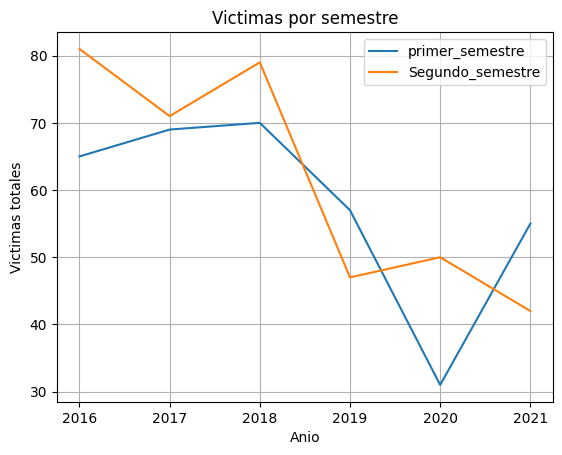

In [8]:
plt.plot(df_agrupado_2["AAAA"], df_agrupado_2["primer_semestre"], label="primer_semestre")
plt.plot(df_agrupado_2["AAAA"], df_agrupado_2["Segundo_semestre"], label="Segundo_semestre")

plt.xlabel("Anio")
plt.ylabel("Victimas totales")
plt.title("Victimas por semestre")
plt.legend()
plt.grid(True)
plt.show()


Ahora aplicaremos la formula de la tasa de siniestros viales para ver nuestro primer KPI

In [9]:
df_agrupado_2["Tasa_primer_semestre"] = df_agrupado_2['primer_semestre']*100000/Habitantes_CABA
df_agrupado_2["Tasa_segundo_semestre"] = df_agrupado_2['Segundo_semestre']*100000/Habitantes_CABA
df_agrupado_2


,AAAA,primer_semestre,Segundo_semestre,Tasa_primer_semestre,Tasa_segundo_semestre
0,2016,65,81,2.082194,2.594734
1,2017,69,71,2.210329,2.274397
2,2018,70,79,2.242363,2.530667
3,2019,57,47,1.825924,1.505587
4,2020,31,50,0.993046,1.601688
5,2021,55,42,1.761857,1.345418


Graficamos la tasa de victimas en relacion a los semestres por cada 100.000 habitantes en un area geografica determinada 

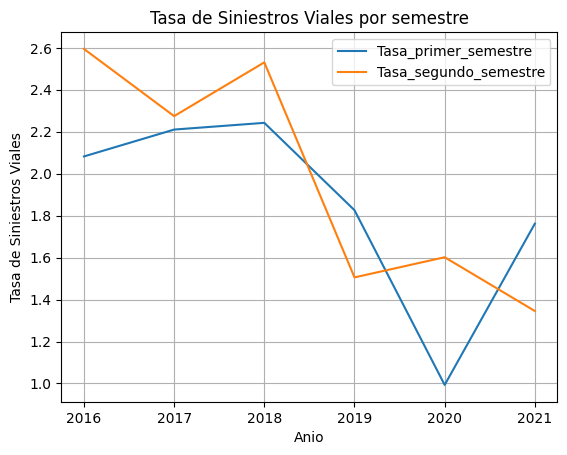

In [10]:
plt.plot(df_agrupado_2["AAAA"], df_agrupado_2["Tasa_primer_semestre"], label="Tasa_primer_semestre")
plt.plot(df_agrupado_2["AAAA"], df_agrupado_2["Tasa_segundo_semestre"], label="Tasa_segundo_semestre")

plt.xlabel("Anio")
plt.ylabel("Tasa de Siniestros Viales")
plt.title("Tasa de Siniestros Viales por semestre")
plt.legend()
plt.grid(True)
plt.show()

Calculamos la reduccion porcentual con respecto a cada semestre 

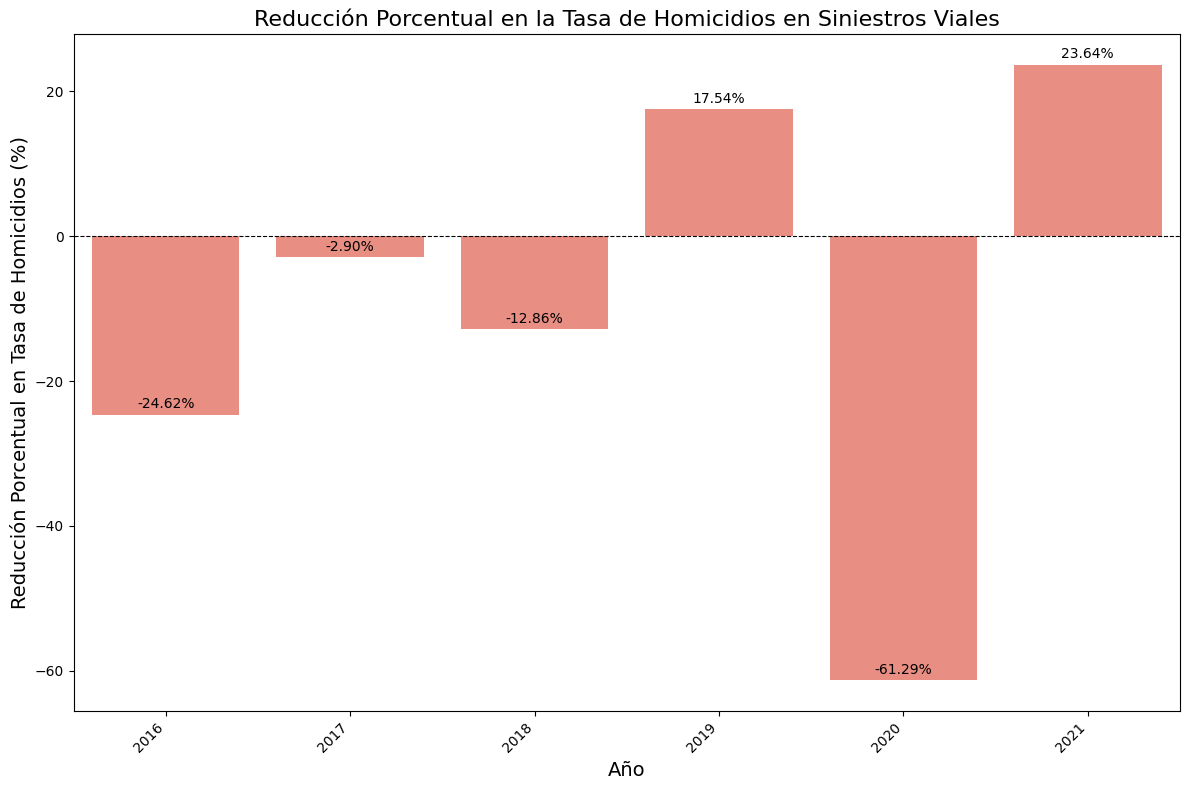

   AAAA  primer_semestre  Segundo_semestre  Tasa_primer_semestre  \
0  2016               65                81              2.082194   
1  2017               69                71              2.210329   
2  2018               70                79              2.242363   
3  2019               57                47              1.825924   
4  2020               31                50              0.993046   
5  2021               55                42              1.761857   

   Tasa_segundo_semestre  Reduccion_porcentual  
0               2.594734            -24.615385  
1               2.274397             -2.898551  
2               2.530667            -12.857143  
3               1.505587             17.543860  
4               1.601688            -61.290323  
5               1.345418             23.636364  


In [30]:
# Calcula la reducción en términos porcentuales
df_agrupado_2['Reduccion_porcentual'] = (
    (df_agrupado_2['Tasa_primer_semestre'] - df_agrupado_2['Tasa_segundo_semestre']) / df_agrupado_2['Tasa_primer_semestre']) * 100

# Crea un gráfico de barras para visualizar la reducción porcentual
plt.figure(figsize=(12, 8))
sns.barplot(x='AAAA', y='Reduccion_porcentual', data=df_agrupado_2, color='salmon')

# Añade etiquetas y título
plt.xlabel('Año', fontsize=14)
plt.ylabel('Reducción Porcentual en Tasa de Homicidios (%)', fontsize=14)
plt.title('Reducción Porcentual en la Tasa de Homicidios en Siniestros Viales', fontsize=16)

# Añade etiquetas de porcentaje en las barras
for i, value in enumerate(df_agrupado_2['Reduccion_porcentual']):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Añade una línea base cero
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(df_agrupado_2)

# 2do_KPI

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

In [25]:
df_Hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Momento_del_dia
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Noche
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Noche
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Dia
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,Noche
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Noche


Contamos de la columna "VICTIMA" las victimas que manejaban moto

In [26]:
df_filtrado = pd.DataFrame(df_Hechos[df_Hechos['VICTIMA'] == "MOTO"])
columns_to_extract = ['AAAA', 'VICTIMA']
df_filtrado_1 = df_filtrado[columns_to_extract].copy()
df_filtrado_2 = df_filtrado_1.groupby('AAAA').count().reset_index()
df_filtrado_2

,AAAA,VICTIMA
0,2016,64
1,2017,53
2,2018,55
3,2019,50
4,2020,27
5,2021,46


Graficamos la cantidad de victimas que manejaban moto 

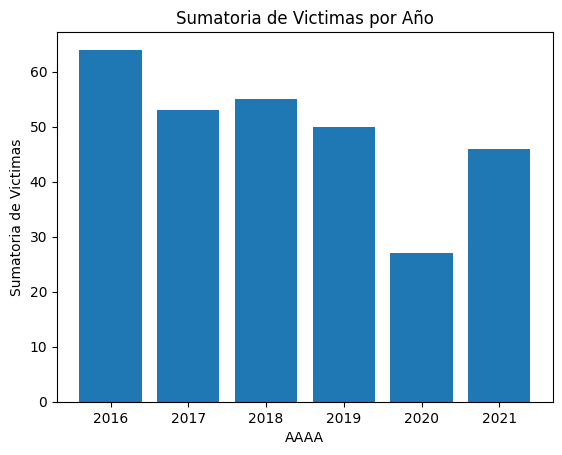

In [27]:
plt.bar(df_filtrado_2['AAAA'], df_filtrado_2['VICTIMA'])
plt.xlabel('AAAA')
plt.ylabel('Sumatoria de Victimas')
plt.title('Sumatoria de Victimas por Año')
plt.show()

Calculamos la variación porcentual 

In [28]:
# Filtra los datos para obtener solo los accidentes con víctimas en moto
df_motociclistas = df_Hechos[df_Hechos['VICTIMA'] == 'MOTO']

# Agrupa por año y cuenta los accidentes mortales con víctimas en moto
accidentes_por_anio = df_motociclistas.groupby('AAAA').size()

# Calcula la variación porcentual
variacion_porcentual = (
    accidentes_por_anio.shift(1) - accidentes_por_anio) / accidentes_por_anio.shift(1) * 100

# Muestra la variación porcentual
print(variacion_porcentual)


AAAA
2016          NaN
2017    17.187500
2018    -3.773585
2019     9.090909
2020    46.000000
2021   -70.370370
dtype: float64


Nombramos la columna de la variación porcentual

In [29]:
variacion_porcentual = pd.DataFrame(variacion_porcentual).reset_index()
variacion_porcentual = variacion_porcentual.rename(columns={0: 'variacion_porcentual'})
variacion_porcentual

,AAAA,variacion_porcentual
0,2016,NaN
1,2017,17.187500
2,2018,-3.773585
3,2019,9.090909
4,2020,46.000000
5,2021,-70.370370


Graficamos la variación porcentual 

posx and posy should be finite values
posx and posy should be finite values


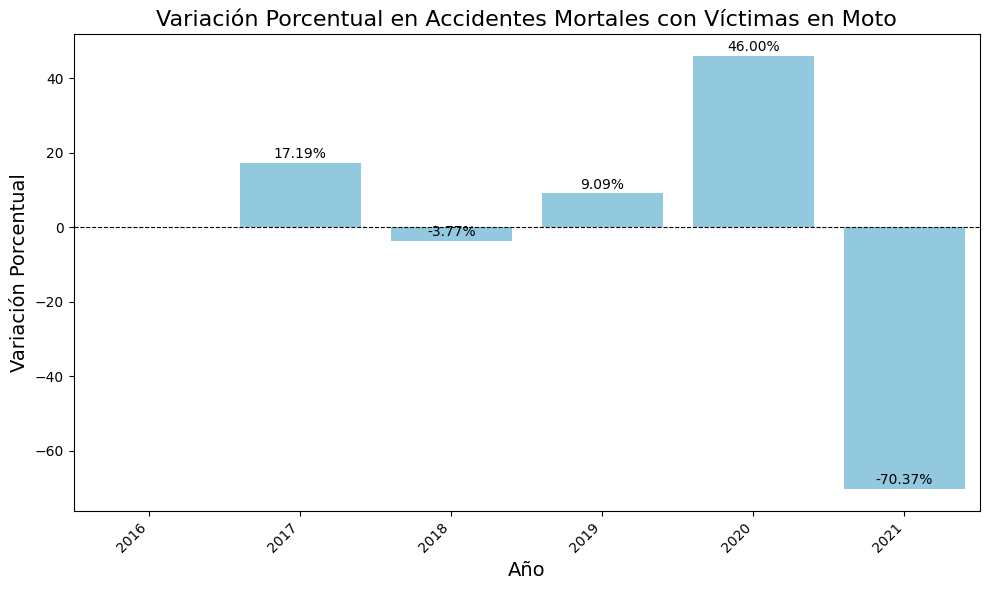

In [31]:
# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='AAAA', y='variacion_porcentual', data=variacion_porcentual, color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Año', fontsize=14)
plt.ylabel('Variación Porcentual', fontsize=14)
plt.title('Variación Porcentual en Accidentes Mortales con Víctimas en Moto', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Agregar porcentajes en las barras
for i, (_, row) in enumerate(variacion_porcentual.iterrows()):
    plt.text(i, row['variacion_porcentual'] + 0.5, f'{row["variacion_porcentual"]:.2f}%', ha='center', va='bottom', fontsize=10)

# Agregar línea base cero
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Como podemos ver la variacion en el ultimo anio fue muy inferior al 7% por lo que concluimos que no se esta cumpliendo el objetivo de nuestro KPI

# 3er_KPI

Al igual que el kpi anterios analizaremos reducir en un 10% la cantidad de accidentes mortales en avenidas en el último año, en CABA, respecto al año anterior.

Realizamos un conteo de la cantidad accidentes que sucedieron en avenidas.

In [18]:
df_filtrado3 = pd.DataFrame(df_Hechos[df_Hechos['TIPO_DE_CALLE'] == "AVENIDA"])
columns_to_extract = ['AAAA', 'TIPO_DE_CALLE']
df_filtrado_4 = df_filtrado3[columns_to_extract].copy()
df_filtrado_5 = df_filtrado_4.groupby('AAAA').count().reset_index()
df_filtrado_5

,AAAA,TIPO_DE_CALLE
0,2016,90
1,2017,76
2,2018,89
3,2019,63
4,2020,50
5,2021,61


Graficamos la cantidad de sucesos accidentales en avenidas

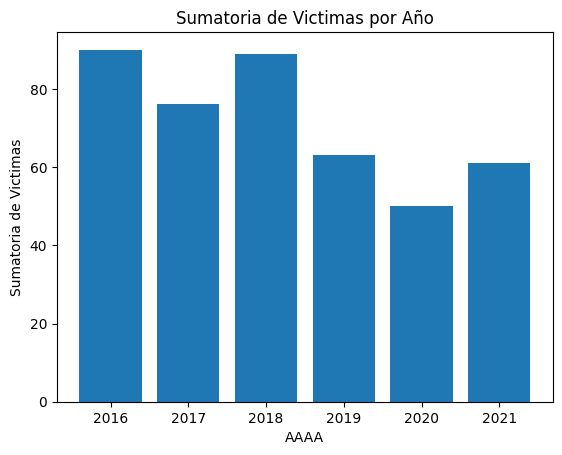

In [19]:
plt.bar(df_filtrado_5['AAAA'], df_filtrado_5['TIPO_DE_CALLE'])
plt.xlabel('AAAA')
plt.ylabel('Sumatoria de Victimas')
plt.title('Sumatoria de Victimas por Año')
plt.show()

In [20]:
# Filtra los datos para obtener solo los accidentes en avenidas
df_AVENIDA = df_Hechos[df_Hechos['TIPO_DE_CALLE'] == 'AVENIDA']

# Agrupa por año y cuenta los accidentes mortales en avenidas
accidentes_por_ano1 = df_AVENIDA.groupby('AAAA').size()

# Calcula la variación porcentual
variacion_porcentual_AVENIDA = (
    accidentes_por_ano1.shift(1) - accidentes_por_ano1) / accidentes_por_ano1.shift(1) * 100

# Muestra la variación porcentual
print(variacion_porcentual_AVENIDA)

AAAA
2016          NaN
2017    15.555556
2018   -17.105263
2019    29.213483
2020    20.634921
2021   -22.000000
dtype: float64


In [21]:
variacion_porcentual_AVENIDA = pd.DataFrame(variacion_porcentual_AVENIDA).reset_index()
variacion_porcentual_AVENIDA= variacion_porcentual_AVENIDA.rename(columns={0: 'variacion_porcentual_2'})
variacion_porcentual_AVENIDA

,AAAA,variacion_porcentual_2
0,2016,NaN
1,2017,15.555556
2,2018,-17.105263
3,2019,29.213483
4,2020,20.634921
5,2021,-22.000000


Graficamos la variacion porcentual

posx and posy should be finite values
posx and posy should be finite values


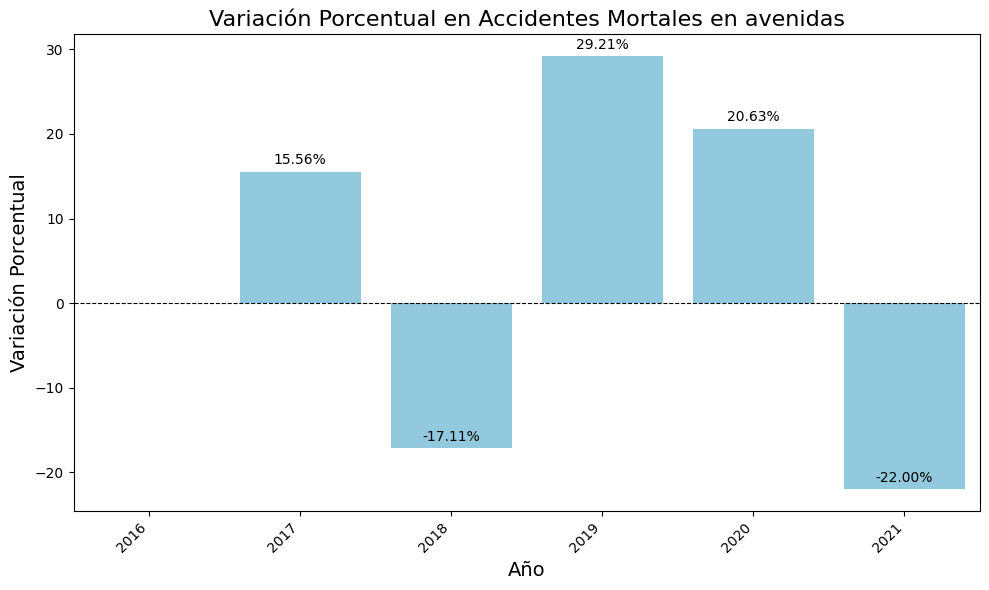

In [22]:
# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='AAAA', y='variacion_porcentual_2', data=variacion_porcentual_AVENIDA, color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Año', fontsize=14)
plt.ylabel('Variación Porcentual', fontsize=14)
plt.title('Variación Porcentual en Accidentes Mortales en avenidas', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Agregar porcentajes en las barras
for i, (_, row) in enumerate(variacion_porcentual_AVENIDA.iterrows()):
    plt.text(i, row['variacion_porcentual_2'] + 0.5, f'{row["variacion_porcentual_2"]:.2f}%', ha='center', va='bottom', fontsize=10)

# Agregar línea base cero
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [23]:
# Exportacion de los dataframe en formato xlsx
df_agrupado_2.to_excel(r'C:\Users\ale_h\Desktop\Henry#\PI individual 2\prueba_ale_2\Datasets3\1er_KPI.xlsx')
variacion_porcentual.to_excel(r'C:\Users\ale_h\Desktop\Henry#\PI individual 2\prueba_ale_2\Datasets3\2do_KPI.xlsx')
variacion_porcentual_AVENIDA.to_excel((r'C:\Users\ale_h\Desktop\Henry#\PI individual 2\prueba_ale_2\Datasets3\3er_KPI.xlsx'))

In [32]:
df_agrupado_2

,AAAA,primer_semestre,Segundo_semestre,Tasa_primer_semestre,Tasa_segundo_semestre,Reduccion_porcentual
0,2016,65,81,2.082194,2.594734,-24.615385
1,2017,69,71,2.210329,2.274397,-2.898551
2,2018,70,79,2.242363,2.530667,-12.857143
3,2019,57,47,1.825924,1.505587,17.543860
4,2020,31,50,0.993046,1.601688,-61.290323
5,2021,55,42,1.761857,1.345418,23.636364
